<h3>  &nbsp;&nbsp;Train on GPU&nbsp;&nbsp; <a href="https://cloud.google.com/tpu/"><img valign="middle" src="https://raw.githubusercontent.com/GoogleCloudPlatform/tensorflow-without-a-phd/master/tensorflow-rl-pong/images/tpu-hexagon.png" width="50"></a></h3>

1. On the main menu, click Runtime and select **Change runtime type**. Set "GPU" as the hardware accelerator.
1. Click Runtime again and select **Runtime > Run All**. You can also run the cells manually with Shift-ENTER. 

In [1]:
import keras
keras.__version__

'2.6.0'

In [2]:
from keras import layers
from keras import models
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

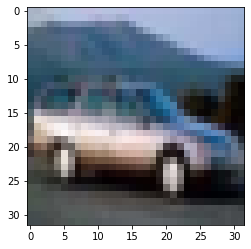

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

plt.show()

In [4]:
# MODIFY THE CODE TO ADD A VALIDATION SET

train_images = train_images[:45000]
train_labels = train_labels[:45000]

valid_images = train_images[-5000:]
valid_labels = train_labels[-5000:]

train_images = train_images.reshape((45000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

valid_images = valid_images.reshape((5000, 32, 32, 3))
valid_images = valid_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
valid_labels = to_categorical(valid_labels)

In [5]:
  # MAKE WHATEVER CHANGES ARE NECESSARY
  # TO GET 0.7 ACCURACY ON THE TEST SET
  
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0

In [7]:
  # MAKE WHATEVER CHANGES ARE NECESSARY
  # TO GET 0.7 ACCURACY ON THE TEST SET

model_hist = model.fit(train_images, train_labels,
          epochs=20, batch_size=128,
            validation_data=(valid_images, valid_labels))
# ADD VALIDATION HERE

Epoch 1/20
352/352 [==============================] - 16s 44ms/step - loss: 1.8555 - accuracy: 0.3207 - val_loss: 1.7654 - val_accuracy: 0.3708
Epoch 2/20
352/352 [==============================] - 15s 41ms/step - loss: 1.4591 - accuracy: 0.4743 - val_loss: 1.4127 - val_accuracy: 0.5092
Epoch 3/20
352/352 [==============================] - 14s 41ms/step - loss: 1.2623 - accuracy: 0.5535 - val_loss: 1.1955 - val_accuracy: 0.5644
Epoch 4/20
352/352 [==============================] - 15s 42ms/step - loss: 1.1179 - accuracy: 0.6090 - val_loss: 1.0568 - val_accuracy: 0.6186
Epoch 5/20
352/352 [==============================] - 15s 41ms/step - loss: 1.0062 - accuracy: 0.6512 - val_loss: 0.9084 - val_accuracy: 0.6806
Epoch 6/20
352/352 [==============================] - 14s 41ms/step - loss: 0.9107 - accuracy: 0.6827 - val_loss: 0.8518 - val_accuracy: 0.6952
Epoch 7/20
352/352 [==============================] - 15s 42ms/step - loss: 0.8216 - accuracy: 0.7165 - val_loss: 0.8391 - val_accuracy:

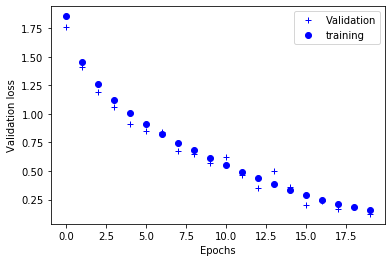

In [8]:
import matplotlib.pyplot as plt

epochs = range(0, 20)
train_loss = model_hist.history['loss']
val_loss= model_hist.history['val_loss']

plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, train_loss, 'bo', label='training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
test_loss

313/313 [==============================] - 1s 5ms/step - loss: 1.3379 - accuracy: 0.7126
test_acc: 0.7125999927520752


1.3379497528076172

In [10]:
model.save_weights('./cifar10.h5', overwrite=True)